# Analysis notebook for the thesis

Basic descriptive statistics are adopted from the SWORDS framework. The implementation for Utrecht University can be found here: https://github.com/UtrechtUniversity/SWORDS-UU

- [Top](#Analysis-notebook-for-the-thesis)
- [User analysis](#Analysis-of-user-collection)
- [Repository analysis](#Analysis-of-repositories)
    - [Correlation analysis - subquestion 2](#Correlation-analysis)
    - [Heatmaps](#Heatmaps)
- [FAIR analysis](#Analysis-of-FAIR-and-nested-variables)

### First, configure modules like pandas and plotting libraries.

In [3]:
import glob
import time
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Folders and constants

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

In [5]:
fp_figs = Path("figs")
fp_tables= Path("tables")
fp_data = Path("data")

# create output folder if not exists
fp_figs.mkdir(exist_ok=True)
fp_tables.mkdir(exist_ok=True)


fp_annotated_users = Path(fp_data, "users_labeled.xlsx")
fp_repos = Path(fp_data, "repositories_labeled_faculty.xlsx")

fp_commits = Path(fp_data, "commits.csv")
fp_contributors = Path(fp_data, "contributors.csv")
fp_howfairis = Path(fp_data, "howfairis.csv")
fp_languages = Path(fp_data, "languages.csv")
fp_readme_variables = Path(fp_data, "readme_variables.csv")
fp_test_paths = Path(fp_data, "test_paths.csv")
fp_topics = Path(fp_data, "topics.csv")
fp_versions = Path(fp_data, "versions.csv")

## Analysis of user collection

- [Top](#Analysis-notebook-for-the-thesis)
- [User analysis](#Analysis-of-user-collection)
- [Repository analysis](#Analysis-of-repository-collection)
- [FAIR analysis](#Analysis-of-FAIR-and-nested-variables)

### Load users

In [6]:
df_annotated_users = pd.read_excel(fp_annotated_users)

df_annotated_users.head()

,user_id,source,service,date,id,node_id,avatar_url,gravatar_id,url,html_url,...,is_research_group,final_decision,note,employee_type,faculty,level1,level2,level3,level4,position
0,73616e646572,profile_page_uu.csv,github.com,2022-07-13,6605233,MDQ6VXNlcjY2MDUyMzM=,https://avatars.githubusercontent.com/u/660523...,NaN,https://api.github.com/users/73616e646572,https://github.com/73616e646572,...,0.0,1,"Collected via profile pages, therefore must be...",User,Humanities,Humanities,Digital Humanities IT,NaN,NaN,Technical Support Assistant for Teaching and R...
1,a-quei,github_search_users.csv,github.com,2022-07-13,6829836,MDQ6VXNlcjY4Mjk4MzY=,https://avatars.githubusercontent.com/u/682983...,NaN,https://api.github.com/users/a-quei,https://github.com/a-quei,...,0.0,1,0,User,Science,Science,Information and computing sciences,Intelligent Software Systems,Natural Language Processing,Lecturer
2,ajueling,github_search_repos.csv,github.com,2022-07-13,20947797,MDQ6VXNlcjIwOTQ3Nzk3,https://avatars.githubusercontent.com/u/209477...,NaN,https://api.github.com/users/AJueling,https://github.com/AJueling,...,0.0,1,0,User,Science,Science,Physics,Marine and Atmospheric Research,Physical Oceanography,PhD Candidate
3,aldertzomer,github_search_users.csv,github.com,2022-07-13,10392411,MDQ6VXNlcjEwMzkyNDEx,https://avatars.githubusercontent.com/u/103924...,NaN,https://api.github.com/users/aldertzomer,https://github.com/aldertzomer,...,0.0,1,0,User,Veterinary Medicine,Veterinary Medicine,Department Biomolecular Health Sciences,Infectious Diseases & Immunology,Clinical Infectiology,Assistant Professor
4,amices,pure.csv,github.com,2022-07-13,69854869,MDEyOk9yZ2FuaXphdGlvbjY5ODU0ODY5,https://avatars.githubusercontent.com/u/698548...,NaN,https://api.github.com/users/amices,https://github.com/amices,...,1.0,1,0,Organization,Social and Behavioural Sciences,NaN,NaN,NaN,NaN,NaN


### Properties of users

,user_id,public_repos
156,uil-ots-labs,126
22,clariah,121
160,utrechtuniversity,112
21,cjvanlissa,91
164,uudigitalhumanitieslab,73
166,vankesteren,58
113,mycrofd,52
119,oceanparcels,51
54,haddocking,49
47,gerkovink,49


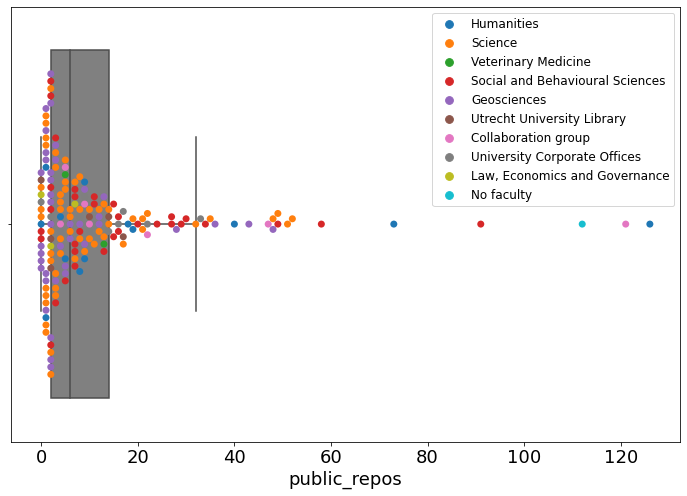

In [7]:
# create a boxplot with swarm
ax = sns.boxplot(x='public_repos', data=df_annotated_users, color=".5", showfliers=False)
ax = sns.swarmplot(x='public_repos', y=[""]*len(df_annotated_users), hue="faculty", data=df_annotated_users, size=7)
plt.legend(fontsize=12)


plt.savefig(Path(fp_figs, f'user_public_repos.png'))
# output users with most public repos
df_annotated_users[['user_id', 'public_repos']].sort_values('public_repos', ascending=False).head(10)

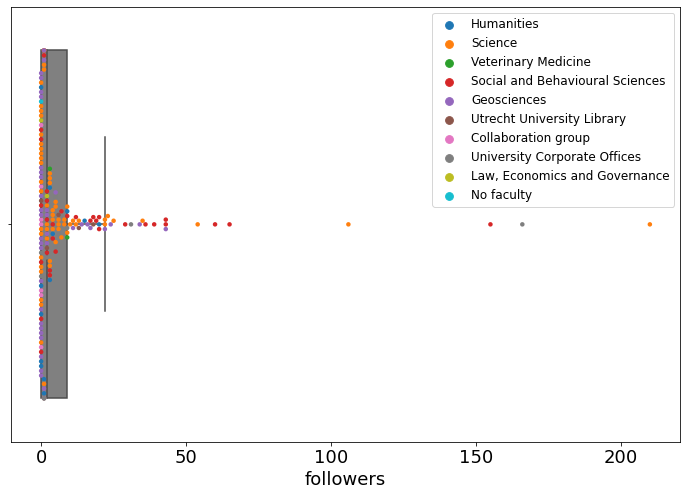

In [8]:
ax = sns.boxplot(x='followers', data=df_annotated_users, color=".5", showfliers=False)
ax = sns.swarmplot(x='followers', y=[""]*len(df_annotated_users), 
                   hue="faculty", data=df_annotated_users, size=4.5)
plt.legend(fontsize=12)

df_annotated_users[['user_id', 'followers']].sort_values('followers', ascending=False).head(10)
plt.savefig(Path(fp_figs, f'user_followers.png'))

,user_id,following
68,j535d165,103
56,hanneoberman,62
166,vankesteren,52
113,mycrofd,51
70,japhir,42
102,leonardovida,40
115,nehamoopen,34
2,ajueling,31
12,basm92,30
79,joaomcteixeira,30


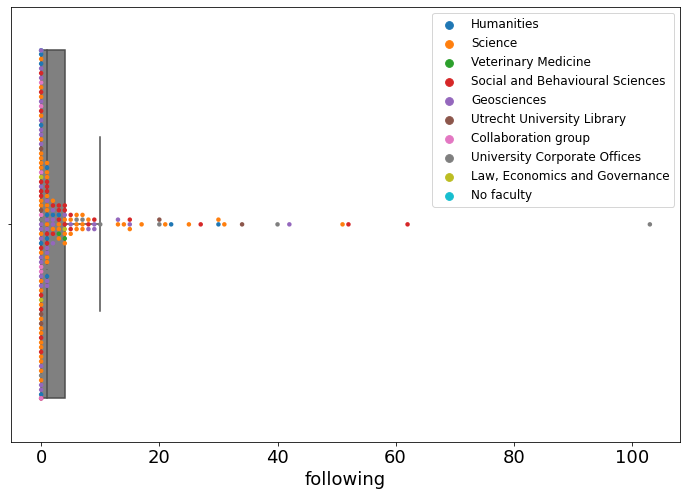

In [9]:
ax = sns.boxplot(x='following', data=df_annotated_users, color=".5", showfliers=False)
ax = sns.swarmplot(x='following', y=[""]*len(df_annotated_users), 
                   hue="faculty", data=df_annotated_users, size=4.5)
plt.legend(fontsize=12)

plt.savefig(Path(fp_figs, f'user_following.png'))
df_annotated_users[['user_id', 'following']].sort_values('following', ascending=False).head(10)

Statistics table for users

In [10]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

stats_users = df_annotated_users[["public_repos",
                                  "followers",
                                  "following"]].agg(["min", 
                                                     q25, 
                                                     "mean", 
                                                     "median", 
                                                     q75, 
                                                     "max",
                                                     "skew",
                                                     "kurt"])
index_names = ['Minimum', '25th quantile', 'Mean', 'Median', '75th quantile', 'Maximum', 'Skewness', 'Kurtosis']
stats_users.index = index_names
stats_users.columns = ["Public repositories","Followers","Following"]
stats_users = stats_users.round(2)
print(stats_users)
stats_users.to_latex(Path(fp_tables, "stats_users.tex"))

               Public repositories  Followers  Following
Minimum                       0.00       0.00       0.00
25th quantile                 2.00       0.00       0.00
Mean                         13.02      10.32       5.44
Median                        6.00       2.00       1.00
75th quantile                14.00       9.00       4.00
Maximum                     126.00     210.00     103.00
Skewness                      3.31       5.16       4.32
Kurtosis                     13.19      30.98      24.24


## Analysis of repositories


- [Top](#Analysis-notebook-for-the-thesis)
- [User analysis](#Analysis-of-user-collection)
- [Repository analysis](#Analysis-of-repositories)
    - [Correlation analysis - subquestion 2](#Correlation-analysis)
    - [Heatmaps](#Heatmaps)
- [FAIR analysis](#Analysis-of-FAIR-and-nested-variables)

In [11]:
from datetime import date
import os
import statistics
from pathlib import Path
from pprint import pprint

import pandas as pd
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib.table as table
import seaborn as sns
import numpy as np

In [12]:
plt.rcParams.update({'font.size': 16})

### Load all data

Load (manually) filtered repositories and variables into notebook.

In [214]:
repos = pd.read_excel(fp_repos)

repos["size"] = repos["size"]/1000  # scale size from kb to mb
repos.head()

C:\Users\beld\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues,watchers,default_branch,permissions,date,faculty,html_url_clickable,repo_type,Note,Label_date
0,247313888,MDEwOlJlcG9zaXRvcnkyNDczMTM4ODg=,AMWG,AJueling/AMWG,False,AJueling,https://github.com/AJueling/AMWG,CESM's AMWG analysis package for IMAU's simula...,False,https://api.github.com/repos/AJueling/AMWG,...,0,0,master,NaN,2022-07-18,Science,https://github.com/AJueling/AMWG,Rscript,NaN,08.08.2022
1,151547397,MDEwOlJlcG9zaXRvcnkxNTE1NDczOTc=,CESM,AJueling/CESM,False,AJueling,https://github.com/AJueling/CESM,NaN,False,https://api.github.com/repos/AJueling/CESM,...,0,1,master,NaN,2022-07-18,Science,https://github.com/AJueling/CESM,Rscript,NaN,08.08.2022
2,373423424,MDEwOlJlcG9zaXRvcnkzNzM0MjM0MjQ=,EC-Earth3-data,AJueling/EC-Earth3-data,False,AJueling,https://github.com/AJueling/EC-Earth3-data,intake-esm catalogues of EC-Earth3(P)-(HR) and...,False,https://api.github.com/repos/AJueling/EC-Earth...,...,0,0,main,NaN,2022-07-18,Science,https://github.com/AJueling/EC-Earth3-data,Rscript,NaN,08.08.2022
3,338361752,MDEwOlJlcG9zaXRvcnkzMzgzNjE3NTI=,FW-code,AJueling/FW-code,False,AJueling,https://github.com/AJueling/FW-code,code for doi:10.5194/os-2020-76,False,https://api.github.com/repos/AJueling/FW-code,...,0,0,main,NaN,2022-07-18,Science,https://github.com/AJueling/FW-code,Rscript,NaN,08.08.2022
4,143137715,MDEwOlJlcG9zaXRvcnkxNDMxMzc3MTU=,LEC,AJueling/LEC,False,AJueling,https://github.com/AJueling/LEC,Lorenz energy Cycle analysis of Parallel Ocean...,False,https://api.github.com/repos/AJueling/LEC,...,0,1,master,NaN,2022-07-18,Science,https://github.com/AJueling/LEC,Rscript,NaN,08.08.2022


In [101]:
# faculties = ['Collaboration group', 'Science', 'University Corporate Offices',
#              'Social and Behavioural Sciences', 'Geosciences',
#              'Veterinary Medicine', 'No faculty', 'Humanities',
#              'Utrecht University Library']
# rs_repos_faculty_list = []
# for faculty in faculties:
#     rs_repos_faculty_list.append(rs_repos.loc[rs_repos['faculty']==faculty])

Using the github API and the Howfairis software, we collected data on the repositories.

Namely, information about commits, contributors, howfairis variables, languages, readme related variables, test paths, topics, and version usage.

In [215]:
commits = pd.read_csv(fp_commits)
contributors = pd.read_csv(fp_contributors)
how_fair_is = pd.read_csv(fp_howfairis)
languages = pd.read_csv(fp_languages)
readme_variables = pd.read_csv(fp_readme_variables)
test_paths = pd.read_csv(fp_test_paths)
topics = pd.read_csv(fp_topics)
versions = pd.read_csv(fp_versions)

test_paths["has_test"] = pd.notna(test_paths["file_location"])
test_paths.drop("file_location",inplace=True, axis=1)

In [216]:
def preprocess_extra_datasets(df):
    if "html_url_repository" in df.columns:
        df.rename(columns={"html_url_repository": "html_url"},inplace=True)
    if "date" in df.columns:
        df.drop('date', axis=1, inplace=True)

preprocess_extra_datasets(commits)
preprocess_extra_datasets(contributors)
preprocess_extra_datasets(how_fair_is)
preprocess_extra_datasets(languages)
preprocess_extra_datasets(readme_variables)
preprocess_extra_datasets(test_paths)
preprocess_extra_datasets(topics)
preprocess_extra_datasets(versions)

Combine datasets. `Contributors`, `languages` and `topics` are 1:n datasets and can't be simply merged.

In [ ]:
# commits 
# contributors = pd.read_csv(fp_contributors)
# how_fair_is 
# languages = pd.read_csv(fp_languages)
# readme_variables 
# test_paths 
# topics = pd.read_csv(fp_topics)
# versions

In [217]:
if repos.shape[1] <= 85:
    repos = pd.merge(repos, commits, how="left", on="html_url")
    repos = pd.merge(repos, how_fair_is, how="left", on="html_url")
    repos = pd.merge(repos, readme_variables, how="left", on="html_url")
    repos = pd.merge(repos, test_paths, how="left", on="html_url")
    repos = pd.merge(repos, versions, how="left", on="html_url")
    print("Merged repos.")

else:
    print("Repos are already merged. If not, reload data and execute again.")
repos.head()

Merged repos.


,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,howfairis_repository,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist,has_install_instruction,has_usage_examples,has_contrib_guidelines,has_test,version_identifiable
0,247313888,MDEwOlJlcG9zaXRvcnkyNDczMTM4ODg=,AMWG,AJueling/AMWG,False,AJueling,https://github.com/AJueling/AMWG,CESM's AMWG analysis package for IMAU's simula...,False,https://api.github.com/repos/AJueling/AMWG,...,True,True,False,False,False,False,False,False,NaN,NaN
1,151547397,MDEwOlJlcG9zaXRvcnkxNTE1NDczOTc=,CESM,AJueling/CESM,False,AJueling,https://github.com/AJueling/CESM,NaN,False,https://api.github.com/repos/AJueling/CESM,...,True,False,False,False,False,False,False,False,True,NaN
2,373423424,MDEwOlJlcG9zaXRvcnkzNzM0MjM0MjQ=,EC-Earth3-data,AJueling/EC-Earth3-data,False,AJueling,https://github.com/AJueling/EC-Earth3-data,intake-esm catalogues of EC-Earth3(P)-(HR) and...,False,https://api.github.com/repos/AJueling/EC-Earth...,...,True,True,False,False,False,False,False,False,NaN,NaN
3,338361752,MDEwOlJlcG9zaXRvcnkzMzgzNjE3NTI=,FW-code,AJueling/FW-code,False,AJueling,https://github.com/AJueling/FW-code,code for doi:10.5194/os-2020-76,False,https://api.github.com/repos/AJueling/FW-code,...,True,True,False,True,False,False,False,False,NaN,True
4,143137715,MDEwOlJlcG9zaXRvcnkxNDMxMzc3MTU=,LEC,AJueling/LEC,False,AJueling,https://github.com/AJueling/LEC,Lorenz energy Cycle analysis of Parallel Ocean...,False,https://api.github.com/repos/AJueling/LEC,...,True,True,False,False,False,False,True,False,NaN,True


In [218]:
rs = ["RS", "Rscript", "RSWIP"]
rs_repos = repos.loc[repos['repo_type'].isin(rs)]

only_rs_repos = repos.loc[repos['repo_type']=="RS"]
only_rscript_repos = repos.loc[repos['repo_type']=="Rscript"]
only_rswip_repos = repos.loc[repos['repo_type']=="RSWIP"]

non_rs_repos = repos.loc[~repos['repo_type'].isin(rs)]

print(f"Number of repositories considered research software: {len(rs_repos.index)}")
print(f"Number of repositories considered non-research software: {len(non_rs_repos.index)}")

Number of repositories considered research software: 823
Number of repositories considered non-research software: 698


In [221]:
howfairis_variables = ["howfairis_repository",
                       "howfairis_license",
                       "howfairis_registry",
                       "howfairis_citation",
                       "howfairis_checklist"]
new_fair_variables = ["vcs_usage", 
#                       "life_span", # life span not considered since it's not boolean
                      "repo_active",
                      "has_install_instruction",
                      "has_usage_examples",
                      "has_contrib_guidelines",
                      "has_test",
                      "version_identifiable"]
all_boolean_variables = howfairis_variables + new_fair_variables

# Fill missing values of booleans with False
rs_repos.fillna(dict.fromkeys(all_boolean_variables, False),inplace=True)

In [116]:
cmap = "mako"
fill_value = None
xlabel= None
ylabel= None

## Correlation analysis

In [222]:
print(f"Howfairis length: {len(how_fair_is)}")
print(f"commits length: {len(commits)}")
print(f"readme_variables length: {len(readme_variables)}")
print(f"test_paths length: {len(test_paths)}")
print(f"versions length: {len(versions)}")
versions["version_identifiable"].value_counts()

Howfairis length: 1517
commits length: 1502
readme_variables length: 1317
test_paths length: 338
versions length: 336


True     268
False     68
Name: version_identifiable, dtype: int64

In [200]:
rs_repos_filled = rs_repos.fillna(False)
distance.dice(rs_repos_filled["howfairis_repository"],rs_repos_filled["howfairis_license"])

0.20616287600880412

[Text(0.5, 1.0, 'Jaccard similarities')]

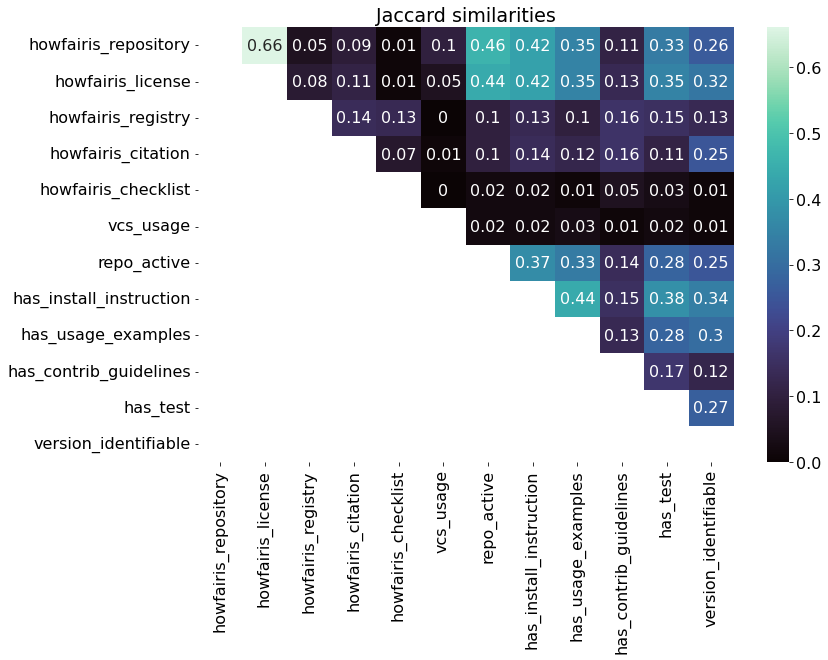

In [245]:
distances = np.zeros(shape=(len(all_boolean_variables),len(all_boolean_variables)))
for i in range(len(all_boolean_variables)-1): 
    for j in range(i+1, len(all_boolean_variables)):
        distances[i][j] = round(distance.jaccard(rs_repos[all_boolean_variables[i]],rs_repos[all_boolean_variables[j]]),2)

distances[distances == 0] = np.nan # remove zeros from plot
similarity = 1-distances # turn distance to similarity
pd_similarity = pd.DataFrame(similarity)
pd_similarity.columns = all_boolean_variables
pd_similarity.index = all_boolean_variables

# pd_similarity.drop("version_identifiable",inplace=True,axis=0)
# pd_similarity.drop("howfairis_repository",inplace=True,axis=1)

s = sns.heatmap(pd_similarity, annot=True, cmap=cmap)
s.set(title="Jaccard similarities")

## Heatmaps

The heatmaps show averages or total counts over the two dimensions `faculty` and `repository type`

In [115]:
def plot_heatmap(repos, value, aggfunc=np.mean, fill_value=None, xlabel=None, ylabel=None, title=None):
    matrix = repos.pivot_table(index="faculty", 
                              columns="repo_type", 
                              values=value, 
                              aggfunc=aggfunc,
                              fill_value=fill_value)
    matrix_total = repos.pivot_table(index="faculty", 
                                        values=value,              
                                        aggfunc=aggfunc,
                                        fill_value=fill_value)

    matrix["Total"] = matrix_total[value]
    matrix = matrix.round(2)

    s = sns.heatmap(matrix, 
                    annot=True, 
                    cmap=cmap,
                    fmt='g')

    s.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig(Path(fp_figs, f'heatmap_{value}.png'))

Global settings for other heatmaps

### Count of repositories in each faculty and repository type

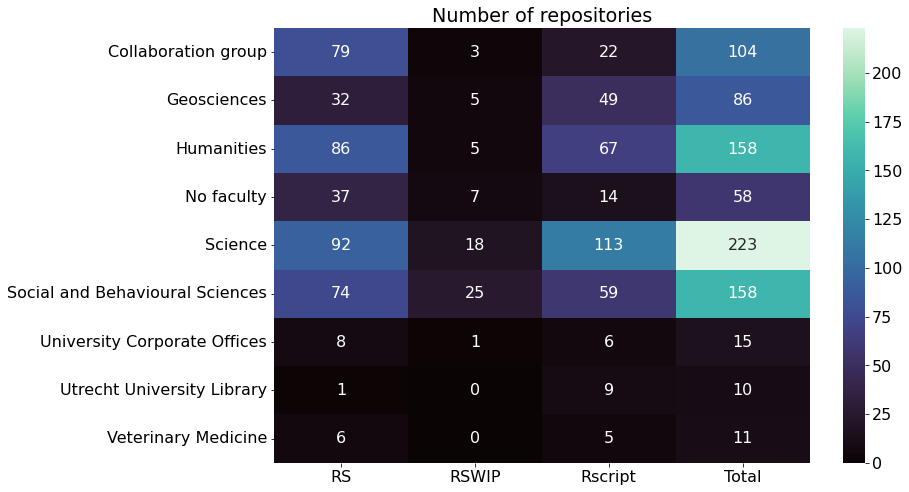

In [117]:
matrix_count = rs_repos.pivot_table(index="faculty", 
                                 columns="repo_type", 
                                 values="size", 
                                 fill_value=0,
                                 aggfunc=len)
matrix_count["Total"] = matrix_count.sum(axis=1)
s = sns.heatmap(matrix_count, 
                annot=True, 
                cmap=cmap,
                fmt='g')
s.set(title="Number of repositories", xlabel=xlabel, ylabel=ylabel)
plt.savefig(Path(fp_figs, f'heatmap_repo_count.png'))

### Stargazers

Stargazers represent the amount of people that have 'starred' a Github project. Starring a project can indicate that a user likes the project. It can also be used to bookmark a project, since starred projects are saved. The amount of stargazers can be used as a metric to measure popularity. 

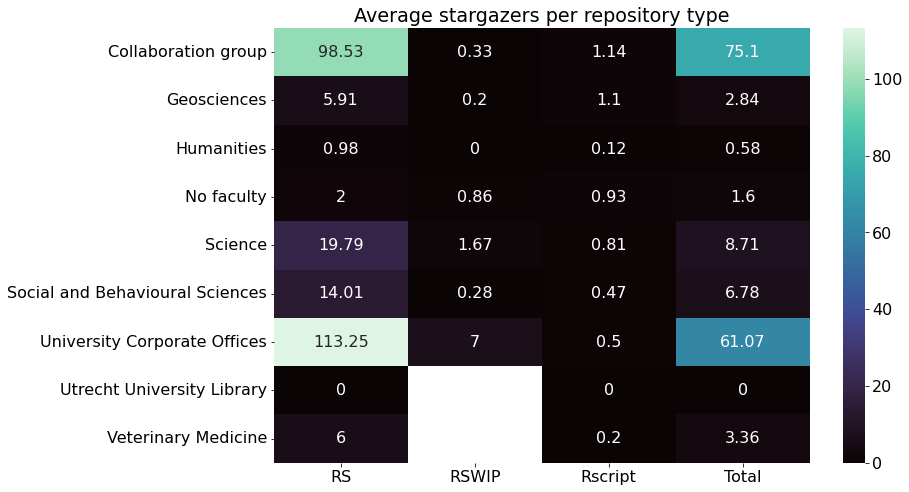

In [118]:
value = "stargazers_count"
aggfunc = np.mean
title = "Average stargazers per repository type"


plot_heatmap(repos=rs_repos, value=value, aggfunc=aggfunc, title=title)

### Watchers

Watchers receive  notifications about project activity. The number of watchers is equal to that of stargazers as described here: https://github.com/orgs/community/discussions/24795

Retrieving the subscriber count is not part of the used API request to retrieve repositories: https://docs.github.com/en/rest/repos/repos#list-repositories-for-a-user

It would be necessary to retrieve each repository individually via this request: https://docs.github.com/en/rest/repos/repos#get-a-repository

Therefore, watchers are not part of the analysis.

### Open issues

An issue is way to keep track of the tasks, enhancements and bugs of the project. They can be discussed in a thread by users and developers. Each repository can enable their own issue page. An issue can be open, for example when a new bug is found, or closed, when it is solved. This shows the amount of open issues a repository has.

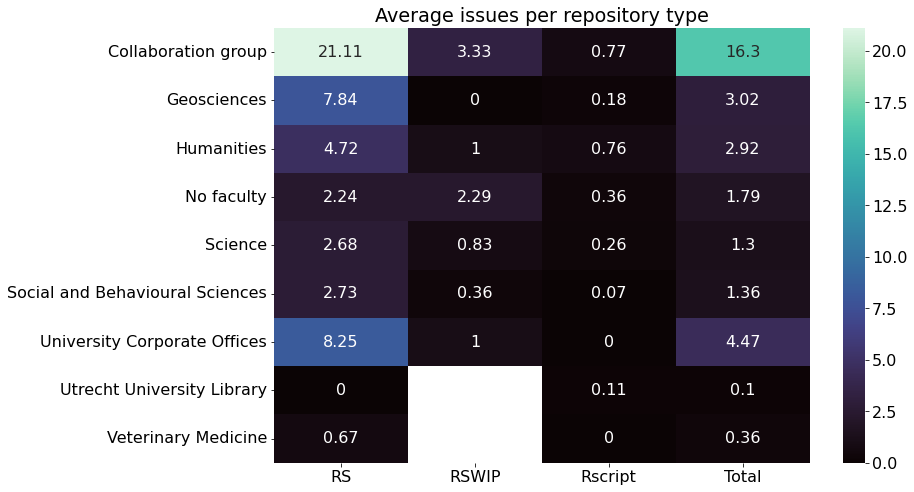

In [119]:
value = "open_issues"
aggfunc = np.mean
title = "Average issues per repository type"


plot_heatmap(repos=rs_repos, value=value, aggfunc=aggfunc, title=title)

### Fork count

A fork is a copy of a repository for another user.

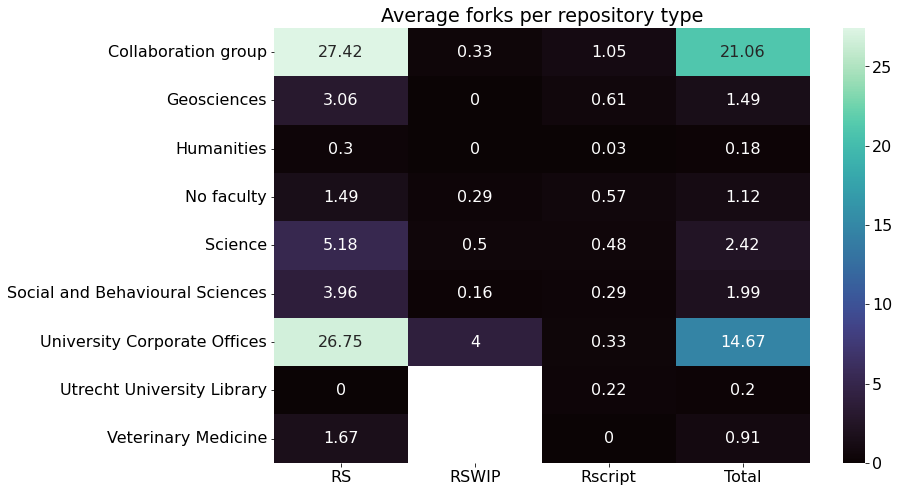

In [120]:
value = "forks"
aggfunc = np.mean
title = "Average forks per repository type"


plot_heatmap(repos=rs_repos, value=value, aggfunc=aggfunc, title=title)

### Size
The size of a repository in kb. This relies on Git alternates. More details can be found here: https://stackoverflow.com/questions/8646517/how-can-i-see-the-size-of-a-github-repository-before-cloning-it/8679592#8679592 There is no official documentation of size calculation.

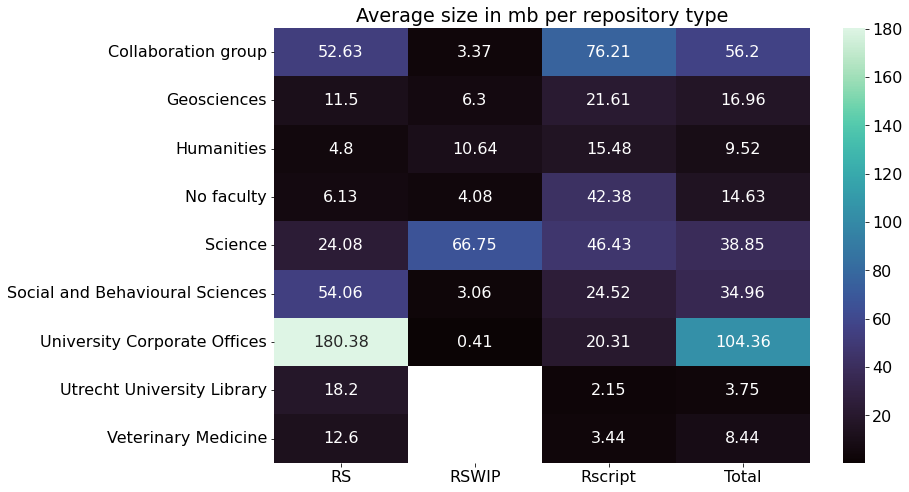

In [121]:
value = "size"
aggfunc = np.mean
title = "Average size in mb per repository type"


plot_heatmap(repos=rs_repos, value=value, aggfunc=aggfunc, title=title)

In [28]:
# TODO: how to best create table? for RS vs non-RS

# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

stats_repos = repos[["stargazers_count",
                     "open_issues",
                     "forks",
                     "size"]].agg(["min", 
                                    q25,
                                    "mean",
                                    "median",
                                    q75,
                                    "max",
                                    "skew",
                                    "kurt"])



In [29]:
col_names = ["Stargazers", "Issues", "Forks", "Size"]
stats_repos.columns = col_names
index_names = ['Minimum', '25th quantile', 'Mean', 'Median', '75th quantile', 'Maximum', 'Skewness', 'Kurtosis']
stats_repos.index = index_names
stats_repos = stats_repos.round(2)
print(stats_repos)
stats_repos.to_latex(Path(fp_tables, "stats_repos.tex"))

               Stargazers  Issues   Forks     Size
Minimum              0.00    0.00    0.00     0.00
25th quantile        0.00    0.00    0.00     0.05
Mean                 9.32    2.46    2.93    25.85
Median               0.00    0.00    0.00     0.74
75th quantile        2.00    0.00    1.00     8.74
Maximum           2286.00  314.00  461.00  1209.65
Skewness            19.38   13.44   15.58     6.74
Kurtosis           484.13  232.97  300.79    57.36


## Analysis of FAIR and nested variables

- [Top](#Analysis-notebook-for-the-thesis)
- [User analysis](#Analysis-of-user-collection)
- [Repository analysis](#Analysis-of-repository-collection)
- [FAIR analysis](#Analysis-of-FAIR-and-nested-variables)

In [127]:
from datetime import date
import statistics
from collections import Counter
from pathlib import Path
import os

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib.table as table
import seaborn as sns
from scipy.spatial import distance

## Sofware licenses 

A license is important because it shows that people have permission to use and modify your code. The plots below show the licenses used in the collection. 


In [31]:
# short names for licenses
licenses_abbr = {
    'MIT License': 'MIT',
    'GNU General Public License v3.0': 'GPLv3',
    'Other': 'Other',
    'Apache License 2.0': 'Apache 2.0',
    'GNU General Public License v2.0': 'GPLv2',
    'BSD 3-Clause "New" or "Revised" License': 'BSD 3-Clause',
    'Creative Commons Attribution 4.0 International': 'CC-BY',
    'Creative Commons Zero v1.0 Universal': 'CC0',
    'GNU Lesser General Public License v3.0': 'LGPLv3',
    'The Unlicense': 'Unlicense',
    'GNU Affero General Public License v3.0': 'AGPPLv3',
    'BSD 2-Clause "Simplified" License': 'BSD 2-Clause',
    'Mozilla Public License 2.0': 'MPL 2.0',
    'GNU Lesser General Public License v2.1': 'LGPLv2.1',
    'Creative Commons Attribution Share Alike 4.0 International': 'CC-BY-SA',
    'ISC License': 'ISC'
    
}

In [32]:
# top most used 10 licences
top_10_licenses = repos["license"].value_counts().head(10)
print(top_10_licenses)

MIT License                                       260
GNU General Public License v3.0                   185
Other                                              95
Apache License 2.0                                 84
GNU General Public License v2.0                    50
BSD 3-Clause "New" or "Revised" License            44
Creative Commons Attribution 4.0 International     32
Creative Commons Zero v1.0 Universal               21
GNU Affero General Public License v3.0             19
GNU Lesser General Public License v3.0              9
Name: license, dtype: int64


C:\Users\beld\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'subset' is not defined

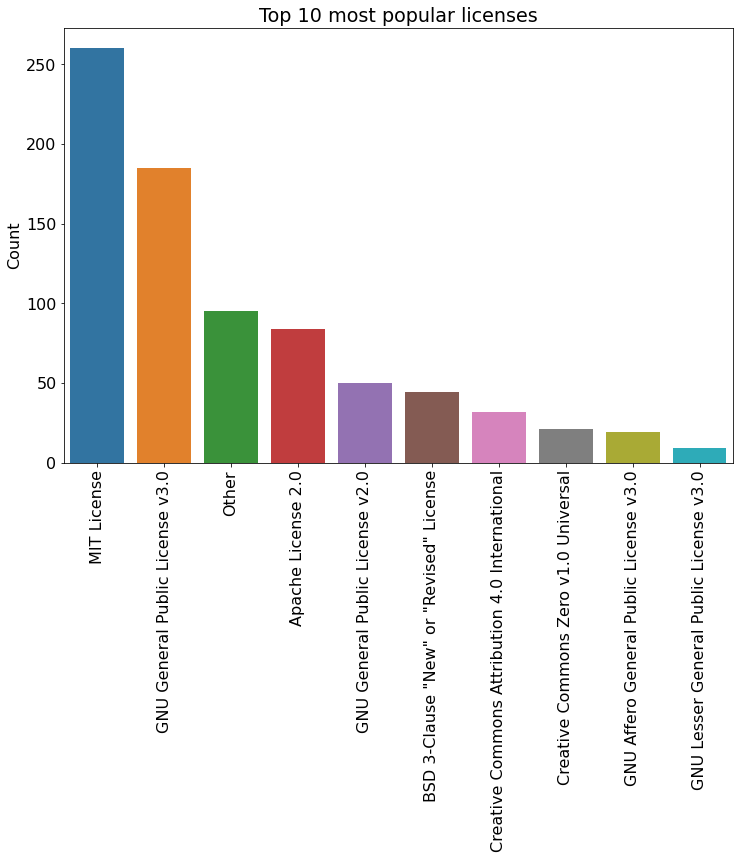

In [33]:
ax = sns.barplot(top_10_licenses.index, top_10_licenses)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel("Count")
ax.set_title("Top 10 most popular licenses")

plt.savefig(Path(fp_figs, f'licenses_first10_{subset}.png'), bbox_inches="tight")

In [ ]:
top_10_licenses_short = repos["license"].replace(licenses_abbr).value_counts().head(10)
print(top_10_licenses_short)

# first 10 licences with short names
ax = sns.barplot(top_10_licenses_short.index, top_10_licenses_short)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel("Count")
ax.set_title("Top 10 most popular licenses")

plt.savefig(Path(fp_figs, f'licenses_short_first10_{subset}.png'), bbox_inches="tight")

In [ ]:
# first 10 licences with short names
ax = sns.barplot(top_10_licenses_short.index, top_10_licenses_short / top_10_licenses_short.sum() * 100)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel("Percentage")
ax.set_title("Top 10 most popular licenses (in %)")

plt.savefig(Path(fp_figs, f'licenses_short_first10_percentage_{subset}.png'), bbox_inches="tight")

Below, the propotion of licenses compared to the total is shown, with their absolute count shown below that. . 

In [ ]:
percentage_license = round(float(repos["license"].isna().sum()/len(repos)* 100),2)
print("{} % of repositories have a license on their page".format(percentage_license))

## Languages

The programming language that is used in the repository gives information on the type of project the repository is. data analysis is mostly done in R and Python, though Python is used for other purposes as well. 

### Jupyter Notebooks

Please note that due to the way GitHub calculates the dominant language in a repository, Jupyter Notebooks tend to be the top language if used in a repository. The top language is determined by the number of characters, which is usually much larger in Jupyter Notebook files compared to for example Python scripts.

In [ ]:
repos["language"].value_counts().shape

In [ ]:
repos["language"].value_counts().plot.bar(figsize = (100,50), fontsize = 100)
plt.title("Programming languages by popularity", fontsize = 100)
plt.savefig(Path(fp_figs, f'language_{subset}.png'), bbox_inches="tight")

In [ ]:
repos["language"].value_counts().head(20).plot.barh(figsize = (50,50), fontsize = 100)
plt.title("Top 20 Programming languages", fontsize = 100)
plt.gca().invert_yaxis()
plt.savefig(Path(fp_figs, f'language_top20_{subset}.png'), bbox_inches="tight")

In [ ]:
top_10_languages = repos["language"].value_counts().drop(["HTML", "TeX"]).head(10)

ax = sns.barplot(top_10_languages.index, top_10_languages / top_10_languages.sum() * 100)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel("Percentage")
ax.set_title("Top 10 most popular languages (in %)")

plt.savefig(Path(fp_figs, f'language_top10_{subset}.png'), bbox_inches="tight")

In [ ]:
repo_languages_rel = repos["language"].value_counts().head(10) / len(repos)
repo_languages_rel.plot.bar(figsize = (50,25), fontsize = 50)
plt.title("Top 10 programming languages (in %)", fontsize = 50)
plt.savefig(Path(fp_figs, f'language_top10_percentage_{subset}.png'), bbox_inches="tight")


## Relative occurence languages

In [ ]:
repo_languages_rel

In [ ]:
languages_rel = languages["language"].value_counts().head(10) / len(repos)
languages_rel.plot.bar(figsize = (50,25), fontsize = 50)
plt.title("Top 10 occuring programming languages (in %)", fontsize = 50)
plt.savefig(Path(fp_figs, f'occurence_language_top10_percentage_{subset}.png'), bbox_inches="tight")


## Topics

Topics describe the context of the repository. 

In [ ]:
topics['topic'].value_counts().nlargest(50)

In [ ]:
topics['topic'].value_counts().nlargest(10).plot(kind = 'bar', title = 'Top 10 topics')
plt.savefig(Path(fp_figs, f'most_occuring_topics_top10_{subset}.png'), bbox_inches="tight")


## Number of  contributors

The number of contributors gives information on how many people put effort into the repository. Theoratically, it would make sense if a higher amount of contributors implied a more FAIR repository, because those are easier to find in a registery and work on because of their license. 


In [ ]:
contributors['html_url_repository'].value_counts().plot.hist(x = 'contributors', figsize = (10,10), fontsize = 12, title = 'Number of contributors')
plt.savefig(Path(fp_figs, f'contributors_{subset}.png'), bbox_inches="tight")


In [ ]:
contributors['html_url_repository'].value_counts().nlargest(20, keep = 'all')


In [ ]:
print('mean contributors: {:.2f}'.format(statistics.mean(contributors['html_url_repository'].value_counts())))
print('median contributors: {}'.format(statistics.median(contributors['html_url_repository'].value_counts())))

## Howfairis sum score descriptives and correlations

In this section, the median and meand of the howfairis sum score is shown, as well as correlations the how fair is sum score, the amount of contributors and the amount of months since the last commit

In [ ]:
how_fair_sum_scores = []
for index, row in how_fair_is.iterrows():
    how_fair_is_sum = row['howfairis_repository'] + row['howfairis_license'] +row['howfairis_registry'] + row['howfairis_citation'] + row['howfairis_checklist']
    how_fair_sum_scores.append(how_fair_is_sum)

In [ ]:
how_fair_is['how_fair_sum_scores'] = how_fair_sum_scores
print("mean: {:.2f}".format(statistics.mean(how_fair_sum_scores)))
print("median: {}".format(statistics.median(how_fair_sum_scores)))
pd.DataFrame((statistics.mean(how_fair_sum_scores), statistics.median(how_fair_sum_scores)),["mean", "median"])
how_fair_is.boxplot(column = 'how_fair_sum_scores')
plt.title('boxplot of the howfairis sumscore')
plt.savefig(Path(fp_figs, f'howfairissum_boxplot_{subset}.png'), bbox_inches="tight")
